In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
News_DIJA_data = pd.read_csv("~/workspace/dat11syd/students/surenchand/data/Combined_News_DJIA.csv")

In [3]:
#drop any nan value
News_DIJA_data.dropna(how='any', inplace=True)

In [4]:
#change object to date time stamp
News_DIJA_data['Date'] = pd.to_datetime(News_DIJA_data['Date'])

In [5]:
News_DIJA_data.select_dtypes(['object']).columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [6]:
#remove unneccesary characters from all columns
News_Columns = News_DIJA_data.select_dtypes(['object']).columns
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace('b"',"",regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("b'","", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("-"," ", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("'","", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("&amp;","",regex=True)

In [6]:
News_DIJA_data.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with impunity, U.N. offi...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The enemy combatent trials are nothing but a s...,...,Georgia Invades South Ossetia if Russia gets...,Al Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"No Help for Mexicos Kidnapping Surge"""
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,"Olympic opening ceremony fireworks faked""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia Rus...,Russia is so much better at war,So this is what its come to: trading sex for f...
2,2008-08-12,0,Remember that adorable 9 year old who sang at ...,"Russia ends Georgia operation""","""If we had no sexual harassment we would have ...",Al Qaeda is losing support in Iraq because of ...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo Georgian War and the Balan...,Im Trying to Get a Sense of This Whole Georgia...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62 year old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,BBC NEWS | Asia Pacific | Extinction by man no...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,"Britain\s policy of being tough on drugs is ""p...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russias...,Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia if ...,"Georgias DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random Houses Refusal to Publ...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Bank analyst forecas

In [7]:
import pandas as pd
News_DIJA_data['Combined'] = ""
for x in News_Columns:
    #print (x)
    News_DIJA_data['Combined'] = News_DIJA_data['Combined'].map(str) + News_DIJA_data[x].map(str)

#pd.concat(News_DIJA_data['Combined'] , News_DIJA_data['Top1'])

In [32]:
News_DIJA_data['Combined'].head(10)

0    Georgia downs two Russian warplanes as countri...
1    Why wont America and Nato help us? If they won...
2    Remember that adorable 9 year old who sang at ...
3     U.S. refuses Israel weapons to attack Iran: r...
4    All the experts admit that we should legalise ...
5    Mom of missing gay man: Too bad hes not a 21 y...
6    In an Afghan prison, the majority of female pr...
7    Man arrested and locked up for five hours afte...
8    Two elderly Chinese women have been sentenced ...
9    British resident held in Guantanamo Bay wins l...
Name: Combined, dtype: object

In [9]:
News_DIJA_data['Combined'].to_csv('myfile.csv')

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=10,  max_features=75)

In [120]:
Text = News_DIJA_data['Combined'].str.lower()

In [125]:
sent_vectors=tfdif.fit_transform(Text)

In [122]:
Words = tfdif.get_feature_names()
print (Words)

['000 people', '10 000', '100 000', 'al jazeera', 'al qaeda', 'barack obama', 'bbc news', 'bin laden', 'boko haram', 'catholic church', 'chemical weapons', 'climate change', 'court rules', 'david cameron', 'death penalty', 'death toll', 'drug war', 'edward snowden', 'european union', 'far right', 'foreign minister', 'high court', 'hong kong', 'human rights', 'iraq war', 'islamic state', 'julian assange', 'kim jong', 'middle east', 'million people', 'new law', 'new york', 'new zealand', 'nobel peace', 'north korea', 'north korean', 'nuclear plant', 'nuclear power', 'nuclear weapons', 'officials say', 'oil spill', 'old girl', 'people killed', 'pirate bay', 'police officer', 'police officers', 'pope francis', 'prime minister', 'renewable energy', 'saudi arabia', 'security forces', 'sex abuse', 'shot dead', 'south africa', 'south african', 'south korea', 'south korean', 'supreme court', 'tens thousands', 'uk government', 'united nations', 'united states', 'vladimir putin', 'war crimes', 'w

In [123]:
len(Words)

75

In [126]:
df1 = pd.DataFrame(sent_vectors.toarray(), columns=tfdif.get_feature_names())
print(df1)

      000 people    10 000  100 000  al jazeera  al qaeda  barack obama  \
0       0.000000  0.000000  0.00000         0.0  0.462986      0.000000   
1       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
2       0.000000  0.000000  0.00000         0.0  0.539517      0.000000   
3       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
4       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
5       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
6       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
7       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
8       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
9       0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
10      0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
11      0.000000  0.000000  0.00000         0.0  0.000000      0.000000   
12      0.000000  0.00000

In [127]:
tfdif.idf_

array([3.84079105, 4.10574487, 4.11704443, 3.96940843, 3.85818279,
       4.36027474, 3.78219689, 4.37487354, 4.45124652, 4.25057582,
       4.78771875, 3.44108965, 4.22493339, 4.33170137, 4.48350738,
       4.29031615, 4.46724686, 4.17554063, 3.87588237, 4.5168438 ,
       4.03003305, 4.48350738, 4.08352174, 2.67012545, 4.62408933,
       3.47638743, 4.14003395, 3.8068895 , 3.72684679, 4.2636479 ,
       4.48350738, 4.4047265 , 3.69654144, 4.56902955, 2.69997841,
       3.63153661, 4.43549816, 4.31771512, 4.345886  , 4.46724686,
       4.41999397, 4.15172999, 4.27689313, 4.187662  , 4.48350738,
       4.3039218 , 4.5168438 , 2.59792915, 4.5168438 , 3.23308908,
       3.96940843, 4.41999397, 3.96940843, 4.03003305, 4.2636479 ,
       3.75809934, 4.27689313, 4.06178175, 4.33170137, 4.43549816,
       3.8068895 , 2.99226242, 3.83220731, 3.74235098, 3.48239345,
       4.53393823, 4.15172999, 3.96940843, 4.4047265 , 3.99926139,
       2.34247736, 4.187662  , 3.85818279, 4.19993209, 4.50003

In [128]:
res = pd.concat([News_DIJA_data, df1], axis=1)

In [129]:
res.drop(res.iloc[:,2:27],axis=1, inplace=True)

In [130]:
res.head()

,Date,Label,Combined,000 people,10 000,100 000,al jazeera,al qaeda,barack obama,bbc news,...,world bank,world cup,world war,worlds biggest,worlds largest,year old,year old girl,years ago,years prison,yr old
0,2008-08-08,0.0,Georgia downs two Russian warplanes as countri...,0.0,0.0,0.0,0.0,0.462986,0.0,0.000000,...,0.0,0.0,0.476333,0.0,0.0,0.281100,0.0,0.0,0.0,0.0
1,2008-08-11,1.0,Why wont America and Nato help us? If they won...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.640775,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,2008-08-12,0.0,Remember that adorable 9 year old who sang at ...,0.0,0.0,0.0,0.0,0.539517,0.0,0.528891,...,0.0,0.0,0.000000,0.0,0.0,0.655130,0.0,0.0,0.0,0.0
3,2008-08-13,0.0,U.S. refuses Israel weapons to attack Iran: r...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.474474,0.0,0.0,0.0,0.0
4,2008-08-14,1.0,All the experts admit that we should legalise ...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [131]:
res.mean()

Label               0.534743
000 people          0.025864
10 000              0.021345
100 000             0.019931
al jazeera          0.024222
al qaeda            0.028279
barack obama        0.016852
bbc news            0.028692
bin laden           0.019096
boko haram          0.017489
catholic church     0.018900
chemical weapons    0.012434
climate change      0.039667
court rules         0.017956
david cameron       0.016548
death penalty       0.015101
death toll          0.018178
drug war            0.016835
edward snowden      0.021515
european union      0.025050
far right           0.016860
foreign minister    0.022157
high court          0.014964
hong kong           0.023362
human rights        0.071417
iraq war            0.014537
islamic state       0.040546
julian assange      0.022531
kim jong            0.027090
middle east         0.031571
                      ...   
police officers     0.017570
pope francis        0.015242
prime minister      0.074034
renewable ener

In [132]:
res.isnull().sum()

Date                3
Label               3
Combined            3
000 people          3
10 000              3
100 000             3
al jazeera          3
al qaeda            3
barack obama        3
bbc news            3
bin laden           3
boko haram          3
catholic church     3
chemical weapons    3
climate change      3
court rules         3
david cameron       3
death penalty       3
death toll          3
drug war            3
edward snowden      3
european union      3
far right           3
foreign minister    3
high court          3
hong kong           3
human rights        3
iraq war            3
islamic state       3
julian assange      3
                   ..
police officers     3
pope francis        3
prime minister      3
renewable energy    3
saudi arabia        3
security forces     3
sex abuse           3
shot dead           3
south africa        3
south african       3
south korea         3
south korean        3
supreme court       3
tens thousands      3
uk governm

In [133]:
res.dropna(how='any', inplace=True)

In [134]:
res.sum().sort_values(ascending=False)

Label               1059.000000
year old             184.349509
prime minister       146.317785
human rights         141.498002
north korea          139.267263
united states        103.881769
saudi arabia          90.615010
islamic state         80.524281
climate change        78.779011
west bank             76.717064
war crimes            64.175153
north korean          62.875789
middle east           62.700095
new zealand           58.816251
south korea           57.126607
bbc news              56.347590
al qaeda              56.162198
kim jong              53.801286
united nations        53.658062
years ago             53.349616
vladimir putin        53.027270
000 people            51.366853
shot dead             50.241539
security forces       50.077032
european union        49.750249
world war             48.142718
al jazeera            48.104828
south africa          47.042998
hong kong             46.396866
worlds largest        45.702628
                       ...     
nuclear 

In [190]:
from sklearn.model_selection import train_test_split
feature_cols = tfdif.get_feature_names()
X = res[feature_cols]
y = res.Label

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [192]:
# fit a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [138]:
coeffs1 = zip(feature_cols, logreg.coef_[0])
list(coeffs1)

[('000 people', 0.16386194008353103),
 ('10 000', 0.7292070425827872),
 ('100 000', -0.7731659425818291),
 ('al jazeera', 1.3229769620291831),
 ('al qaeda', -0.07585946345654425),
 ('barack obama', -0.0051270405429318195),
 ('bbc news', 0.44648349182865243),
 ('bin laden', -0.10330569391041325),
 ('boko haram', -0.18918601092815537),
 ('catholic church', 0.0738043420470376),
 ('chemical weapons', 1.1767296533708373),
 ('climate change', 0.4489764416377018),
 ('court rules', -0.4701996437146385),
 ('david cameron', 0.6899405634255953),
 ('death penalty', 2.5397059347941147),
 ('death toll', 0.5535290184994888),
 ('drug war', 0.32694652911763805),
 ('edward snowden', 0.4632757071658816),
 ('european union', -0.5801417411286176),
 ('far right', 0.2774150458433479),
 ('foreign minister', 1.3420405644092335),
 ('high court', -0.3412124928378351),
 ('hong kong', 0.36453473332823855),
 ('human rights', 0.21716788161158165),
 ('iraq war', -0.1252876272479909),
 ('islamic state', -0.35828557974

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

label_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, label_pred))
print(mean_squared_error(y_test, label_pred))

0.5241935483870968
0.47580645161290325


In [140]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : label_pred})
cm = confusion_matrix(compare['Actual'], compare['Predicted'])
print (cm)

[[ 99 145]
 [ 91 161]]


In [141]:
import numpy as np

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0] + cm[1,1])/np.sum(cm)
print('Accuracy :', accuracy)

Sensitivity :  0.4057377049180328
Specificity :  0.6388888888888888
Accuracy : 0.5241935483870968


In [143]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.48743719 0.51758794 0.53266332 0.53266332 0.52020202 0.53030303
 0.51010101 0.58080808 0.49494949 0.52284264]
0.5229558034751514


In [144]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

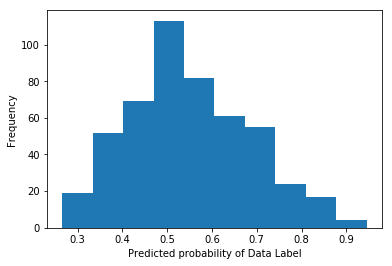

In [145]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of Data Label')
plt.ylabel('Frequency')

In [158]:
y_pred_data_label = np.where(y_pred_prob > 0.45, 1, 0)

In [159]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_data_label = binarize(y_pred_prob.reshape(1,-1), 0.45).T

In [160]:
# new confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_data_label)
print (cm)

[[ 62 182]
 [ 52 200]]


In [161]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0] + cm[1,1])/np.sum(cm)
print('Accuracy :', accuracy)

Sensitivity :  0.2540983606557377
Specificity :  0.7936507936507936
Accuracy : 0.5282258064516129


In [162]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=10
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0],
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=10000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='newton-cg', tol=10, verbose=0)

In [163]:
label_pred = lrcv.predict(X_test)

print(metrics.accuracy_score(y_test, label_pred))
print(mean_squared_error(y_test, label_pred))

0.5080645161290323
0.49193548387096775


In [170]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', min_df=10, max_features=100)
cv_fit=cv.fit_transform(Text)
print(cv.get_feature_names())

['000', '10', 'al', 'american', 'anti', 'army', 'arrested', 'attack', 'ban', 'bank', 'billion', 'british', 'calls', 'children', 'china', 'chinese', 'city', 'countries', 'country', 'court', 'day', 'dead', 'death', 'drug', 'end', 'eu', 'european', 'forces', 'french', 'gaza', 'german', 'germany', 'global', 'government', 'group', 'human', 'india', 'international', 'internet', 'iran', 'iraq', 'islamic', 'israel', 'israeli', 'just', 'killed', 'korea', 'law', 'leader', 'like', 'man', 'men', 'military', 'million', 'minister', 'new', 'news', 'north', 'nuclear', 'officials', 'oil', 'old', 'palestinian', 'people', 'police', 'power', 'president', 'prime', 'protest', 'protesters', 'public', 'report', 'right', 'rights', 'russia', 'russian', 'said', 'saudi', 'say', 'says', 'security', 'sex', 'south', 'state', 'syria', 'syrian', 'time', 'troops', 'uk', 'united', 'use', 'video', 'war', 'water', 'woman', 'women', 'world', 'worlds', 'year', 'years']


In [171]:
Words_1 = cv.get_feature_names()

In [173]:
df2 = pd.DataFrame(cv_fit.toarray(), columns=cv.get_feature_names())
print(df2)

      000  10  al  american  anti  army  arrested  attack  ban  bank  ...    \
0       1   0   1         1     0     0         0       1    0     0  ...     
1       0   0   0         1     0     1         0       0    0     0  ...     
2       0   0   1         0     0     0         0       0    0     0  ...     
3       0   1   0         0     1     0         0       2    0     0  ...     
4       1   0   0         1     0     0         0       0    0     1  ...     
5       1   0   0         0     0     0         0       0    0     0  ...     
6       1   0   0         0     0     0         0       0    0     0  ...     
7       1   4   0         0     0     0         1       0    0     0  ...     
8       0   0   1         1     0     0         0       0    0     0  ...     
9       0   1   0         0     0     0         0       1    0     0  ...     
10      0   0   0         0     0     0         1       1    0     1  ...     
11      0   0   0         0     0     0         0   

In [174]:
res1 = pd.concat([News_DIJA_data, df2], axis=1)

In [175]:
res1.dropna(how='any', inplace=True)

In [176]:
res1.sum().sort_values(ascending=False)

says          2380.0
new           2209.0
government    1904.0
police        1784.0
people        1746.0
world         1594.0
000           1573.0
israel        1503.0
year          1481.0
war           1457.0
years         1393.0
china         1314.0
president     1297.0
killed        1286.0
said          1150.0
state         1128.0
israeli       1097.0
military      1082.0
Label         1059.0
russia        1041.0
uk            1035.0
korea         1019.0
minister       994.0
nuclear        985.0
russian        983.0
north          976.0
court          949.0
death          900.0
old            897.0
iran           891.0
               ...  
protest        557.0
officials      557.0
army           555.0
power          555.0
german         553.0
10             552.0
arrested       549.0
european       548.0
group          543.0
public         537.0
eu             536.0
woman          533.0
islamic        532.0
sex            531.0
prime          526.0
right          526.0
french       

In [184]:
feature_cols = cv.get_feature_names()
X = res1[feature_cols]
y = res1.Label
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=1)

In [186]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train1, y_train1)

label_pred = logreg.predict(X_test1)

print(metrics.accuracy_score(y_test1, label_pred))
print(mean_squared_error(y_test1, label_pred))

0.44556451612903225
0.5544354838709677


In [187]:
lrcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=10
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
lrcv.fit(X_train1, y_train1)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0],
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=10000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='newton-cg', tol=10, verbose=0)

In [189]:
label_pred = lrcv.predict(X_test1)

print(metrics.accuracy_score(y_test1, label_pred))
print(mean_squared_error(y_test1, label_pred))

0.5020161290322581
0.49798387096774194


In [182]:
import sklearn.ensemble

In [218]:
bag = sklearn.ensemble.BaggingRegressor(sklearn.linear_model.LogisticRegressionCV(),
                                  n_estimators=50,
                                  max_features=75,
                                  max_samples=0.25,
                                  n_jobs=-1
                                 )

In [219]:
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=75,
         max_samples=0.25, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [220]:
label_pred = bag.predict(X_test)

#print(sklearn.metrics.accuracy_score(y_test, label_pred))
print(mean_squared_error(y_test, label_pred))

0.38529435483870966
